# Invasive Ventilators

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data
data = pd.read_csv('Hospitalization_all_locs.csv')


# Printing first five rows and data type of each column
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

   V1 location_name        date  allbed_mean  allbed_lower  allbed_upper  \
0   1       Abruzzo  2020-01-03          0.0           0.0           0.0   
1   2       Abruzzo  2020-01-04          0.0           0.0           0.0   
2   3       Abruzzo  2020-01-05          0.0           0.0           0.0   
3   4       Abruzzo  2020-01-06          0.0           0.0           0.0   
4   5       Abruzzo  2020-01-07          0.0           0.0           0.0   

   ICUbed_mean  ICUbed_lower  ICUbed_upper  InvVen_mean  ...  newICU_upper  \
0          0.0           0.0           0.0          0.0  ...           0.0   
1          0.0           0.0           0.0          0.0  ...           0.0   
2          0.0           0.0           0.0          0.0  ...           0.0   
3          0.0           0.0           0.0          0.0  ...           0.0   
4          0.0           0.0           0.0          0.0  ...           0.0   

   totdea_mean  totdea_lower  totdea_upper  bedover_mean  bedover_lower  \

# Data Wrangling

* We're grouping by date and applying sum because we have data on states, and all the mean points corresponding to states add up to resemble those for countries. 
* We're also eliminating all those rows which have zeroes in mean, lower bound and upper bound columns

In [3]:
data = data[['date', 'InvVen_mean',  'InvVen_lower',  'InvVen_upper']].groupby(['date']).sum().reset_index()
data = data[(data['InvVen_mean']!=0) & (data['InvVen_lower']!=0) & (data['InvVen_upper']!=0)]

In [4]:
# Fetching only columns of interest
InvVenData = data[['date', 'InvVen_mean']]
InvVenData.head()

,date,InvVen_mean
47,2020-02-19,14.000000
48,2020-02-20,20.000000
49,2020-02-21,30.000000
50,2020-02-22,44.861562
51,2020-02-23,59.692562


### Datetime conversion

Since date column is having object data type, let's resolve that.

In [5]:
InvVenData['date'] = pd.to_datetime(InvVenData['date'])

/Users/jeradwilliams/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now, since there are multiple values corresponding to one date because we removed location column from this data, we need to group these dates and find out the final invasive ventilators value corresponding to each date.

### Grouping the column by date

In [18]:
InvVenData = InvVenData.groupby(['date']).sum().reset_index()
InvVenData.iloc[50:100]

,date,InvVen_mean
50,2020-04-09,68105.599678
51,2020-04-10,69163.305523
52,2020-04-11,69666.134408
53,2020-04-12,70152.357266
54,2020-04-13,71302.233448
55,2020-04-14,72196.852267
56,2020-04-15,69541.931331
57,2020-04-16,67684.815202
58,2020-04-17,66060.654885
59,2020-04-18,63972.719730


In [19]:
#setting index to date
InvVenData = InvVenData.set_index('date')
InvVenData.index

DatetimeIndex(['2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28',
               ...
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08'],
              dtype='datetime64[ns]', name='date', length=141, freq=None)

In [20]:
# Keeping historical data till 25th April 2020
InvVenData = InvVenData[InvVenData.index <= '2020-04-25']
InvVenData.columns = ['value']
InvVenData.tail()

,value
date,
2020-04-21,58881.825251
2020-04-22,55737.753214
2020-04-23,52713.573389
2020-04-24,49541.685316
2020-04-25,46038.848421


### Missing value analysis

We'll check is there's any missing value present in our data by applying isnull function on the dataset.

In [21]:
InvVenData.isnull().any()

value    False
dtype: bool

Since, we get 'False' as the result, we can say that there are no missing values in the dataset.

### Detecting outliers

Firstly, let's follow graphical procedure to analyze if the data contains outliers or not. We'll use boxplot for this.

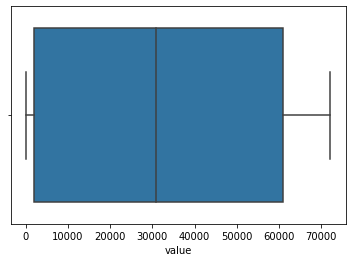

In [22]:
import seaborn as sns
sns.boxplot(x=InvVenData['value'])

The boxplot shows that there are no outliers in the data, as there's no point which is lying outside of whiskers. Let's now see this via z-scores.

In [24]:
from scipy import stats
z = np.abs(stats.zscore(InvVenData))
print(z)

[[1.15562923]
 [1.15541465]
 [1.15505701]
 [1.1545255 ]
 [1.15399509]
 [1.15328382]
 [1.15286536]
 [1.15145316]
 [1.14937112]
 [1.14720561]
 [1.14382303]
 [1.13946196]
 [1.13724241]
 [1.12754848]
 [1.12053607]
 [1.10799062]
 [1.09454819]
 [1.07934628]
 [1.05846631]
 [1.04920073]
 [1.01523392]
 [0.9822151 ]
 [0.95436997]
 [0.91176472]
 [0.86567168]
 [0.79336641]
 [0.7222842 ]
 [0.65451687]
 [0.5740568 ]
 [0.472479  ]
 [0.37184177]
 [0.28582847]
 [0.17327981]
 [0.05271718]
 [0.04674922]
 [0.14162189]
 [0.28002477]
 [0.41490943]
 [0.52790322]
 [0.64186304]
 [0.76069306]
 [0.82844243]
 [0.86041868]
 [0.97581595]
 [1.04814403]
 [1.11605383]
 [1.19583856]
 [1.29010804]
 [1.30518724]
 [1.24689325]
 [1.2795792 ]
 [1.31740669]
 [1.33538972]
 [1.35277885]
 [1.39390269]
 [1.42589759]
 [1.33094775]
 [1.26453039]
 [1.20644438]
 [1.13177207]
 [1.0796304 ]
 [0.99552412]
 [0.94970278]
 [0.83725909]
 [0.72910319]
 [0.6156647 ]
 [0.49039024]]


As can be seen from above array, every value has z-score less than +3 or greater than -3. Thus, no outliers are present in the data.